In [1]:
import math
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_datareader as pdr
from datetime import datetime, timedelta

In [7]:
!pip install --upgrade pandas_datareader


In [8]:
import yfinance as yf
from datetime import datetime, timedelta

# Stock details
ticker = 'SBUX'
stock = "Starbucks Corporation"

# Define time range
today = datetime.today()
start_date = (today - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = (today - timedelta(days=62)).strftime('%Y-%m-%d')

# Fetch data
stock_df = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open   Volume
Ticker           SBUX       SBUX       SBUX       SBUX       SBUX     SBUX
Date                                                                      
2019-11-25  75.265747  83.750000  84.000000  82.930000  83.160004  5450400
2019-11-26  75.993706  84.559998  84.650002  84.000000  84.129997  7651500
2019-11-27  77.081116  85.769997  85.809998  84.419998  84.849998  7502400
2019-11-29  76.775581  85.430000  86.730003  85.250000  85.910004  3857000
2019-12-02  76.002678  84.570000  85.769997  83.820000  85.379997  6425800


In [9]:
# Date is an index but to be sure , let's sort
stock_df = stock_df.sort_index(ascending=True)
stock_df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SBUX,SBUX,SBUX,SBUX,SBUX,SBUX
Date,,,,,,
2019-11-25,75.265747,83.750000,84.000000,82.930000,83.160004,5450400
2019-11-26,75.993706,84.559998,84.650002,84.000000,84.129997,7651500
2019-11-27,77.081116,85.769997,85.809998,84.419998,84.849998,7502400
2019-11-29,76.775581,85.430000,86.730003,85.250000,85.910004,3857000
2019-12-02,76.002678,84.570000,85.769997,83.820000,85.379997,6425800
...,...,...,...,...,...,...
2024-09-16,95.717949,96.309998,98.599998,95.980003,98.519997,9263400
2024-09-17,95.847153,96.440002,96.540001,95.199997,96.489998,6281700


In [23]:
if 'Close' in stock_df.columns:
    TSdata_df = stock_df[['Close']]  # Create DataFrame with 'Close' prices
    print(TSdata_df.head())
else:
    print("The 'Close' column is missing from the fetched data.")


Price           Close
Ticker           SBUX
Date                 
2019-11-25  83.750000
2019-11-26  84.559998
2019-11-27  85.769997
2019-11-29  85.430000
2019-12-02  84.570000


In [10]:
# check for nulls
stock_df.isna().sum()

,,0
Price,Ticker,
Adj Close,SBUX,0
Close,SBUX,0
High,SBUX,0
Low,SBUX,0
Open,SBUX,0
Volume,SBUX,0


In [11]:
# Get shape
stock_df.shape

(1213, 6)

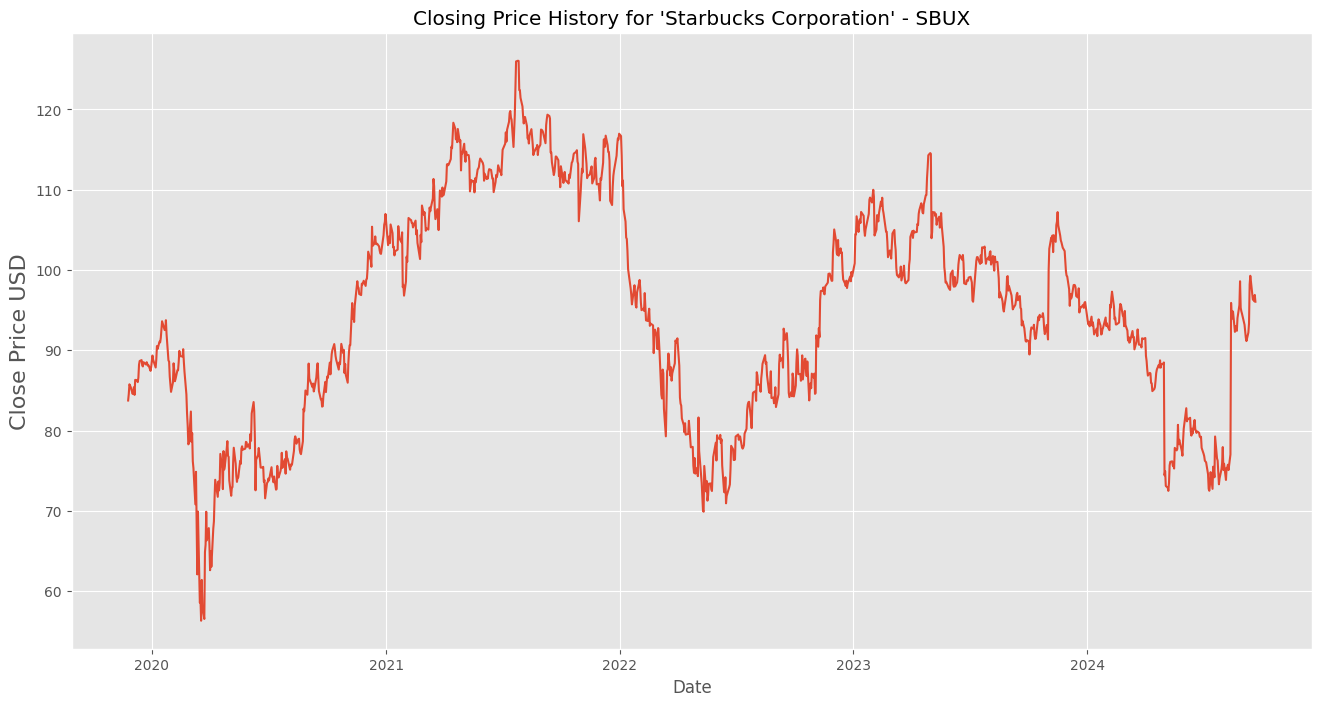

In [13]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title (f"Closing Price History for '{stock}' - {ticker}")
plt.plot(stock_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('/content/his_'+ticker+'.png')
plt.show()

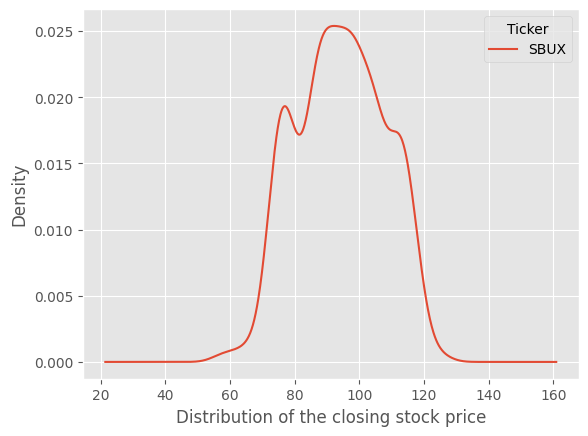

In [15]:
stock_df['Close'].plot.density()
plt.xlabel('Distribution of the closing stock price')
plt.savefig('/content/den_'+ticker+'.png')
plt.show()

In [16]:
# DF with only close
TSdata_df = stock_df.filter(['Close'])
TSdata_df

Date
2019-11-25
2019-11-26
2019-11-27
2019-11-29
2019-12-02
...
2024-09-16
2024-09-17
2024-09-18
2024-09-19


In [17]:
TSdata_arr = TSdata_df.values # this creates an array of Close Price
TSdata_arr

array([], shape=(1213, 0), dtype=float64)

In [24]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

# Fetch stock data
ticker = 'SBUX'
today = datetime.today()
start_date = (today - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = (today - timedelta(days=62)).strftime('%Y-%m-%d')

stock_df = yf.download(ticker, start=start_date, end=end_date)

# Ensure stock data is valid
if stock_df.empty:
    raise ValueError("Stock data is empty. Check ticker and date range.")

# Extract Close prices
TSdata_df = stock_df[['Close']].dropna()

# Convert to numpy array
TSdata_arr = TSdata_df['Close'].values

# Debug the array shape
print(f"TSdata_arr shape: {TSdata_arr.shape}")
print(f"TSdata_arr sample: {TSdata_arr[:5]}")

# Ensure TSdata_arr is not empty
if TSdata_arr.size == 0:
    raise ValueError("TSdata_arr is empty. Check your data source and preprocessing steps.")

# Perform ADF Test
result = adfuller(TSdata_arr, autolag='AIC')

# Print results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Check stationarity
if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")


[*********************100%***********************]  1 of 1 completed

TSdata_arr shape: (1213, 1)
TSdata_arr sample: [[83.75      ]
 [84.55999756]
 [85.76999664]
 [85.43000031]
 [84.56999969]]
ADF Statistic: -2.032963
p-value: 0.272310
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


In [26]:
df2 = TSdata_df['Close'].diff().dropna()
df2

Ticker,SBUX
Date,
2019-11-26,0.809998
2019-11-27,1.209999
2019-11-29,-0.339996
2019-12-02,-0.860001
2019-12-03,0.250000
...,...
2024-09-16,-2.260002
2024-09-17,0.130005
2024-09-18,-0.320000


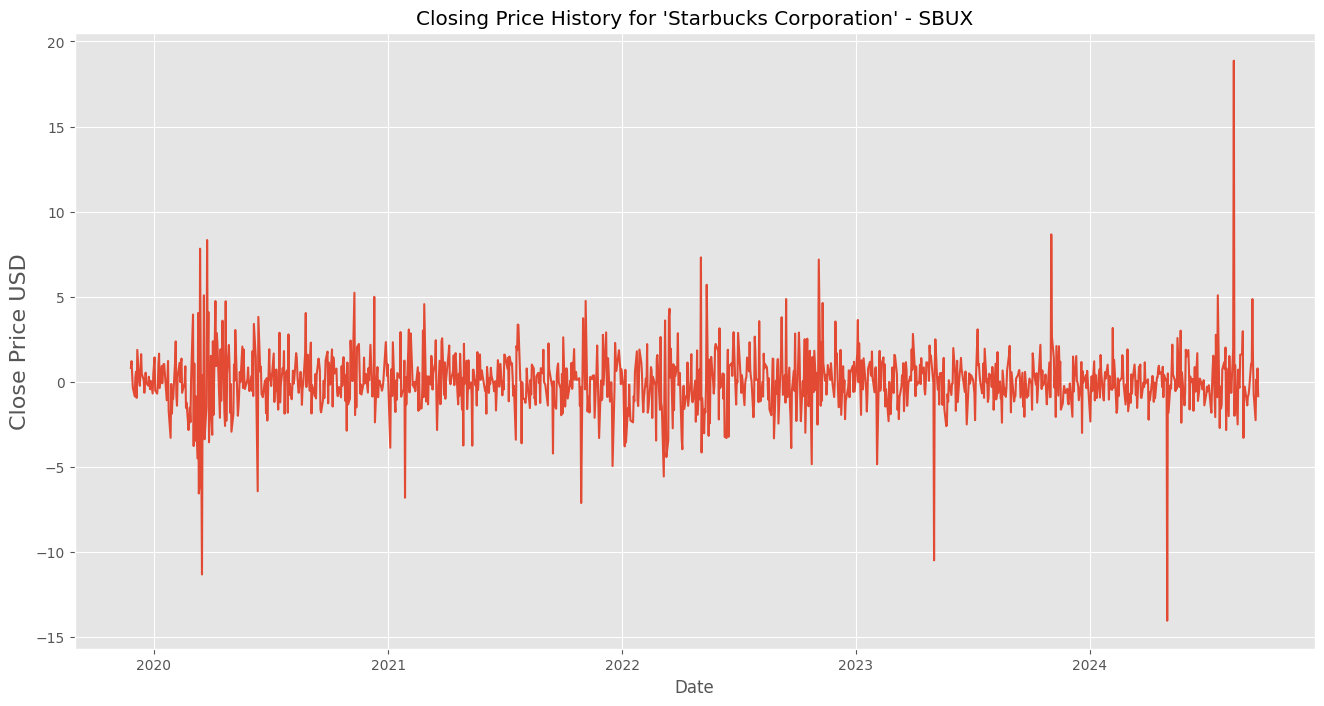

In [29]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title (f"Closing Price History for '{stock}' - {ticker}")
plt.plot(df2['SBUX'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('/content/diff_'+ticker+'.png')
plt.show()

In [30]:
# Scale the Data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(TSdata_arr)
# scaled_data

In [31]:
training_data_len = math.ceil(len(TSdata_arr) * 0.75)
training_data_len

910

In [32]:
# Created scaled training dataset
train_data = scaled_data[0:training_data_len]
train_data.shape

(910, 1)

In [33]:
# Split
X_train = []
y_train = []

for i in range(ts_points, len(train_data)):
    X_train.append(train_data[i-ts_points:i,0])
    y_train.append(train_data[i,0])
    # if i <= ts_points+3:
    #     print(X_train)
    #     print(y_train)
    #     print()

In [34]:
# convert X_train and y_train to numpy arrays for LSTM
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
print (X_train.shape)
print (y_train.shape)

(790, 120)
(790,)


In [36]:
# LSTM network expects a 3D input (No_of_Samples, number of time steps, and number of features) no_of_features = 1 (Close)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(790, 120, 1)

In [37]:
training_data_len - ts_points


790

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [48]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size=64

# Create directory for checkpoints
os.makedirs("chk_points/", exist_ok=True)
chkpoint_path = "chk_points/weights.{epoch:02d}.weights.h5"


# Create ModelCheckpoint callback
chkpt_callback = ModelCheckpoint(
    filepath=chkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch'  # Save every epoch
)

# chkpoint_path = "chk_points/cp-{epoch:04d}.ckpt"
# chkpt_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=chkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     save_freq=5*batch_size)

# model.save_weights(chkpoint_path.format(epoch=0))

In [49]:
# model.fit(X_train, y_train, batch_size=batch_size, epochs=50, validation_split=0.43, callbacks=[chkpt_callback])
model.fit(X_train, y_train, batch_size=64 ,epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: 0.1134
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0190
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0106
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0076
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0060
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.0059
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0045
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0049
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0046
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0047
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0041
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0041
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0042
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0041
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [50]:
model.save('/content/Model_'+ticker+'.h5')


In [51]:
# Bring in the last 'ts_points' (120 values) from training set so when X_test is used to predict , predictions have same shape as Y_test
# The for loop starts with 'ts_points' that means the resultant array will have 120 less rows
test_data = scaled_data[training_data_len-ts_points:]

In [52]:
X_test = []
y_test = TSdata_arr[training_data_len:]
for i in range(ts_points, len(test_data)):
    X_test.append(test_data[i-ts_points:i,0])

In [53]:
# convert the data to a numpy array to use it in LSTM MODEL
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1], 1))

In [54]:
from sklearn.metrics import mean_squared_error


In [55]:
# Models predicted price for X_train
predictions_tr = model.predict(X_train)
predictions_tr = scaler.inverse_transform(predictions_tr)

y_train_tr =  scaler.inverse_transform(y_train.reshape(-1,1))
rmse_tr = math.sqrt(mean_squared_error(y_train_tr, predictions_tr))
rmse_tr

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


2.290327508665081

In [56]:
# Models predicted price for X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [57]:
y_test.shape, predictions.shape


((303, 1), (303, 1))

In [58]:
# RMSE to check accuracy

rmse = math.sqrt(mean_squared_error(y_test, predictions))
rmse

2.719077864406676

In [59]:
# Plot
train = TSdata_df[:training_data_len]
actual = TSdata_df[training_data_len:]
actual['Predictions'] = predictions
actual

<ipython-input-59-bb86776ae978>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Predictions'] = predictions


Price,Close,Predictions
Ticker,SBUX,
Date,,
2023-07-11,100.089996,98.353104
2023-07-12,101.139999,99.076958
2023-07-13,101.599998,100.137367
2023-07-14,101.610001,101.191650
2023-07-17,100.930000,101.972878
...,...,...
2024-09-16,96.309998,98.274178
2024-09-17,96.440002,98.726021


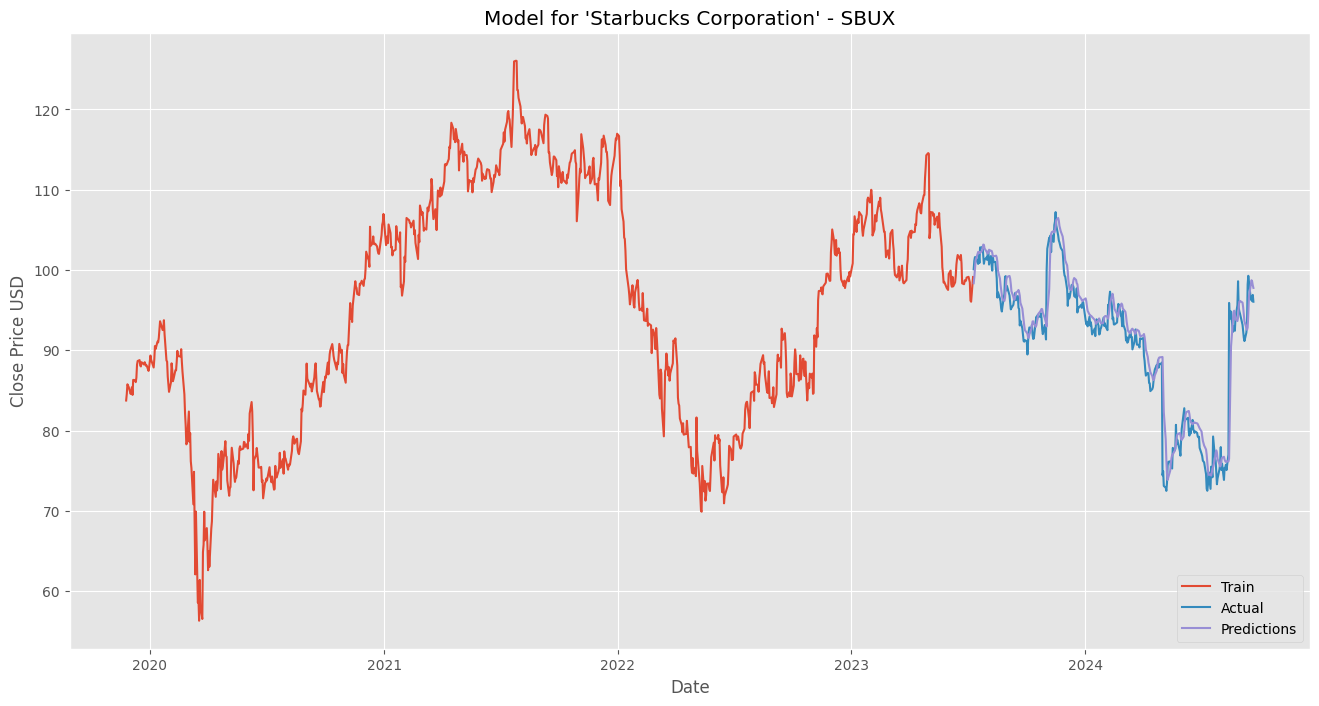

In [61]:
plt.figure(figsize=(16,8))
plt.title(f"Model for '{stock}' - {ticker}")
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.plot(train['Close'])
plt.plot(actual[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.savefig('/content/'+ticker+'.png')
plt.show()

TEST

In [62]:
# for predictions add 100 extra days to make sure it has more than ts_points to make up for missing days (weekends and holidays)

fetch_days = ts_points + 100

sd =  today - timedelta(days=fetch_days)
sd = sd.strftime('%Y-%m-%d')

ed = today.strftime('%Y-%m-%d')
ed

next_day = (today + timedelta(days=1) ).strftime('%Y-%m-%d')
# next_day

In [64]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define ticker, start date, and end date
ticker = "SBUX"  # Replace with your ticker symbol
sd = "2016-01-01"  # Start date
ed = "2023-01-01"  # End date
ts_points = 120  # Number of time series points

# Fetch data using yfinance
quote = yf.download(ticker, start=sd, end=ed)

# Filter for 'Close' prices
new_df = quote[['Close']]

# Get the last n days
last_n_days = ts_points
last_n_days_arr = new_df[-last_n_days:].values

[*********************100%***********************]  1 of 1 completed


In [66]:
##########################loading saved model ###############################
new_model = tf.keras.models.load_model('/content/Model_'+ticker+'.h5')

# Check its architecture
new_model.summary()
nmpred_price = new_model.predict(X_test)
nmpred_price = scaler.inverse_transform(nmpred_price)
nmpred_price = nmpred_price[0][0]
print(f"Predicted Closing price for '{stock}' on {next_day} is {nmpred_price:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,903 (124.62 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Predicted Closing price for 'Starbucks Corporation' on 2024-11-23 is 98.3531


In [67]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price = pred_price[0][0]
print(f"Predicted Closing price for '{stock}' on {next_day} is {pred_price:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Predicted Closing price for 'Starbucks Corporation' on 2024-11-23 is 98.3531


In [69]:
import yfinance as yf
from datetime import datetime, timedelta

# Define ticker and calculate the start date (5 days ago)
ticker = "SBUX"  # Replace with your ticker symbol
today = datetime.today()
d1 = (today - timedelta(days=5)).strftime('%Y-%m-%d')

# Fetch data for the last 5 days
quote2 = yf.download(ticker, start=d1)

# Display the fetched data
print(quote2)


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High        Low        Open   Volume
Ticker            SBUX        SBUX        SBUX       SBUX        SBUX     SBUX
Date                                                                          
2024-11-18  100.400002  100.400002  100.610001  97.930000   98.440002  7044700
2024-11-19   98.349998   98.349998  100.300003  98.199997   99.790001  9176200
2024-11-20   98.260002   98.260002   98.750000  97.110001   98.000000  7527700
2024-11-21  100.059998  100.059998  100.330002  98.489998   99.500000  6760600
2024-11-22  102.500000  102.500000  102.559998  99.769997  100.000000  6511448
